In [5]:
# %load first_cell.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

import seaborn as sns

%load_ext autoreload
%autoreload 2


In [8]:
from pathlib import Path

In [14]:
PATH = Path('/data/forecast')
list(PATH.iterdir())

[PosixPath('/data/forecast/train_corrected.csv')]

In [15]:
data = pd.read_csv(PATH/'train_corrected.csv', parse_dates['Timestamp'])
data.head()

,Timestamp,SiteId,ForecastId,Value,wday,mday,yday,month,year,time,...,wday_cos,yday_sin,yday_cos,month_sin,month_cos,time_sin,time_cos,Temperature,Distance,off
0,2009-06-23 06:45:00,297,6603,96408.826731,1,23,174,6,2009,6.75,...,0.5,0.145799,-0.989314,1.224647e-16,-1.0,0.980785,-0.195090,14.0,1.707966,0
1,2009-06-23 07:45:00,297,6603,76800.251802,1,23,174,6,2009,7.75,...,0.5,0.145799,-0.989314,1.224647e-16,-1.0,0.896873,-0.442289,15.0,1.707966,0
2,2009-06-23 08:45:00,297,6603,75166.203892,1,23,174,6,2009,8.75,...,0.5,0.145799,-0.989314,1.224647e-16,-1.0,0.751840,-0.659346,16.0,1.707966,0
3,2009-06-23 09:45:00,297,6603,71898.108070,1,23,174,6,2009,9.75,...,0.5,0.145799,-0.989314,1.224647e-16,-1.0,0.555570,-0.831470,18.0,1.707966,0
4,2009-06-23 10:45:00,297,6603,73532.155981,1,23,174,6,2009,10.75,...,0.5,0.145799,-0.989314,1.224647e-16,-1.0,0.321439,-0.946930,21.0,1.707966,0


In [18]:
buildings = data.groupby('SiteId')['Value'].count().to_frame()

In [19]:
buildings.sort_values('Value', ascending = False).head(10)

,Value
SiteId,
302,223620
261,154219
6,139716
269,126370
271,124407
237,120432
8,114962
276,102359
233,102255


In [30]:
data[data['SiteId'] == 6].head()

,Timestamp,SiteId,ForecastId,Value,wday,mday,yday,month,year,time,...,wday_cos,yday_sin,yday_cos,month_sin,month_cos,time_sin,time_cos,Temperature,Distance,off
108745,2013-01-01 01:00:00,6,43,25108.373290,1,1,1,1,2013,1.00,...,0.5,0.017213,0.999852,0.5,0.866025,0.258819,0.965926,NaN,NaN,0
108753,2013-01-01 01:15:00,6,43,25062.047878,1,1,1,1,2013,1.25,...,0.5,0.017213,0.999852,0.5,0.866025,0.321439,0.946930,NaN,NaN,0
108760,2013-01-01 01:30:00,6,43,25015.722466,1,1,1,1,2013,1.50,...,0.5,0.017213,0.999852,0.5,0.866025,0.382683,0.923880,NaN,NaN,0
108767,2013-01-01 01:45:00,6,43,24969.397055,1,1,1,1,2013,1.75,...,0.5,0.017213,0.999852,0.5,0.866025,0.442289,0.896873,NaN,NaN,0
108775,2013-01-01 02:00:00,6,43,24923.071643,1,1,1,1,2013,2.00,...,0.5,0.017213,0.999852,0.5,0.866025,0.500000,0.866025,NaN,NaN,0


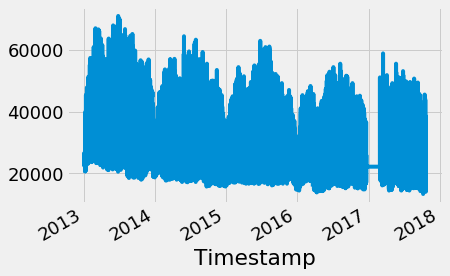

In [32]:
build = data[data['SiteId'] == 6].copy().set_index('Timestamp')
build.index = pd.to_datetime(build.index)
build['Value'].plot()

In [29]:
build['Value'].describe()

count    1.542190e+05
mean     1.324835e+05
std      2.978915e+07
min      0.000000e+00
25%      2.842791e+04
50%      4.390288e+04
75%      7.883502e+04
max      1.169846e+10
Name: Value, dtype: float64

In [33]:
build.reset_index(inplace = True)

In [36]:
weekly = build.groupby(['time', 'wday'])['Value'].mean().to_frame().reset_index()
weekly.head()

,time,wday,Value
0,0.0,0,20494.051304
1,0.0,1,20800.909625
2,0.0,2,20903.038512
3,0.0,3,21097.169276
4,0.0,4,21096.680137


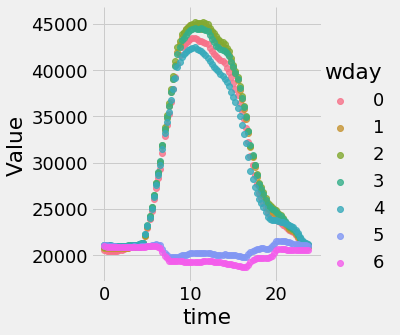

In [40]:
sns.lmplot('time', 'Value', weekly, hue = 'wday', fit_reg = False)

In [42]:
build['time_since'] = (build['Timestamp'] - build.loc[0, 'Timestamp']).dt.total_seconds()

In [44]:
list(build.columns)

['Timestamp',
 'SiteId',
 'ForecastId',
 'Value',
 'wday',
 'mday',
 'yday',
 'month',
 'year',
 'time',
 'wday_sin',
 'wday_cos',
 'yday_sin',
 'yday_cos',
 'month_sin',
 'month_cos',
 'time_sin',
 'time_cos',
 'Temperature',
 'Distance',
 'off',
 'time_since']

In [48]:
no_cyc = [x for x in build if ('sin' not in x) and ('cos' not in x)]
no_cyc = no_cyc[4:]
no_cyc

['wday',
 'mday',
 'yday',
 'month',
 'year',
 'time',
 'Temperature',
 'Distance',
 'off']

In [75]:
cyc = no_cyc + [x for x in build if ('sin' in x) or ('cos') in x]
cyc

['wday',
 'mday',
 'yday',
 'month',
 'year',
 'time',
 'Temperature',
 'Distance',
 'off',
 'wday_sin',
 'wday_cos',
 'yday_sin',
 'yday_cos',
 'month_sin',
 'month_cos',
 'time_sin',
 'time_cos',
 'time_since']

In [49]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(3)

In [51]:
for (train_indices, valid_indices) in tss.split(build):
    print('N Train indices: ', len(train_indices))
    print('N Valid indices: ', len(valid_indices))

N Train indices:  35186
N Valid indices:  35186
N Train indices:  70372
N Valid indices:  35186
N Train indices:  105558
N Valid indices:  35186


In [79]:
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesRegressor

pipeline = Pipeline([('imputer', Imputer(strategy = 'median')), 
            ('scaler', MinMaxScaler(feature_range = (0, 1)))])

scaled_data = pipeline.fit_transform(build[no_cyc])

In [60]:
from sklearn.linear_model import LinearRegression

In [71]:
imputer = Imputer()

y = imputer.fit_transform(np.array(build['Value']).reshape((-1, 1)))

In [63]:
scaled_data = np.nan_to_num(scaled_data)

In [57]:
from sklearn.metrics import mean_absolute_error

In [67]:
np.any(~np.isfinite(scaled_data))

False

In [ ]:
y =

In [72]:
np.any(~np.isfinite(y))

False

In [80]:
et = ExtraTreesRegressor(n_estimators=200)
for (train_indices, valid_indices) in tss.split(build):
    et.fit(scaled_data[train_indices], y[train_indices])
    pred = et.predict(scaled_data[valid_indices])
    print(f'Mean absolute error {round(mean_absolute_error(y[valid_indices], pred), 2)}')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Mean absolute error 3133.46


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Mean absolute error 2740.2


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Mean absolute error 2836.93


In [81]:
pipeline = Pipeline([('imputer', Imputer(strategy = 'median')), 
            ('scaler', MinMaxScaler(feature_range = (0, 1)))])

scaled_data = pipeline.fit_transform(build[cyc])

In [82]:
et = ExtraTreesRegressor(n_estimators=200)
for (train_indices, valid_indices) in tss.split(build):
    et.fit(scaled_data[train_indices], y[train_indices])
    pred = et.predict(scaled_data[valid_indices])
    print(f'Mean absolute error {round(mean_absolute_error(y[valid_indices], pred), 2)}')

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Mean absolute error 2857.99


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Mean absolute error 2421.61


/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Mean absolute error 2600.27


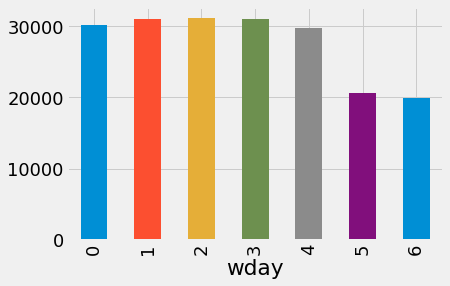

In [84]:
week = build.groupby('wday')['Value'].mean().to_frame()
week['Value'].plot.bar()

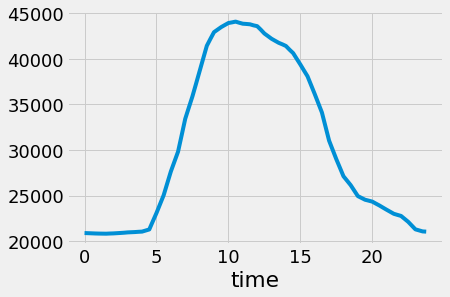

In [86]:
day = build[build['wday'] < 5].groupby('time')['Value'].mean().to_frame()
day['Value'].plot()

In [87]:
day.head()

,Value
time,
0.00,20877.260442
0.25,20861.944603
0.50,20846.628764
0.75,20830.045867
1.00,20818.709034


In [98]:
X = np.array(day.index).reshape((-1, 1))
y = np.array(day.Value)

lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
mean_absolute_error(y, lr.predict(X))

8283.867314442812

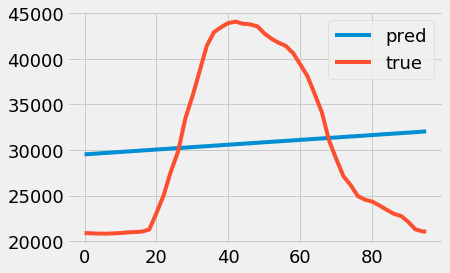

In [113]:
time = np.arange(0, 24, 0.25)
pred = time * lr.coef_[0] + lr.intercept_

plt.plot(pred, label = 'pred')
plt.plot(day['Value'], label = 'true')
plt.legend();

In [103]:
lr.coef_

array([69.317871])

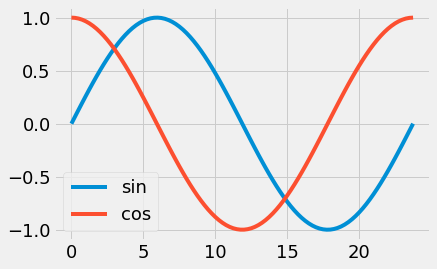

In [104]:
day['time-sin'] = np.sin( (2 * np.pi * day.index) / day.index.max())
day['time-cos'] = np.cos( (2 * np.pi * day.index) / day.index.max())

plt.plot(day['time-sin'], label = 'sin')
plt.plot(day['time-cos'], label = 'cos')
plt.legend();

In [105]:
lr.fit(np.array(day[['time-sin', 'time-cos']]), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [106]:
mean_absolute_error(y, lr.predict(np.array(day[['time-sin', 'time-cos']])))

1812.1148112842523

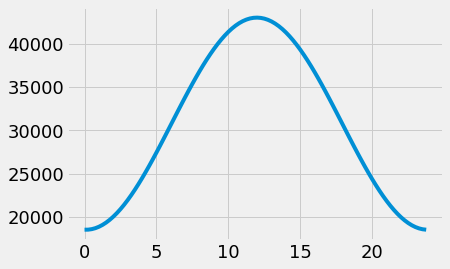

In [107]:
time = np.arange(0, 24, 0.25)
pred = day['time-sin'] * lr.coef_[0] + day['time-cos'] * lr.coef_[1] + lr.intercept_

plt.plot(pred, label = 'pred')
plt.plot(day['Value'], label = 'true')
plt.legend();

In [109]:
day.reset_index(inplace = True)

lr.fit(np.array(day[['time', 'time-sin', 'time-cos']]), y)
mean_absolute_error(y, lr.predict(np.array(day[['time', 'time-sin', 'time-cos']])))

1751.4723751478202

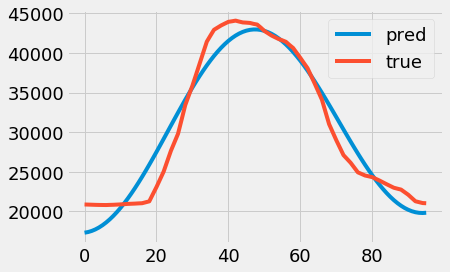

In [112]:
time = np.arange(0, 24, 0.25)
pred = day['time'] * lr.coef_[0] + day['time-sin'] * lr.coef_[1] + day['time-cos'] * lr.coef_[2] + lr.intercept_

plt.plot(pred, label = 'pred')
plt.plot(day['Value'], label = 'true')
plt.legend();

In [108]:
week

,Value
wday,
0,30191.915945
1,30964.755331
2,31211.765252
3,31014.549713
4,29821.020682
5,20587.579612
6,19972.084044
